# CNN


B.R. Kavitha, C. Srimathi,
"Benchmarking on offline Handwritten Tamil Character Recognition using convolutional neural networks",
*Journal of King Saud University - Computer and Information Sciences*,
2019,
,
ISSN 1319-1578,
https://doi.org/10.1016/j.jksuci.2019.06.004.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/data
!ls

#### Load the pickled Dataset in Bunch Datatype

In [ ]:
import pickle
import numpy as np

with open("raw.pickle",'rb') as _ :
  dataset = pickle.load(_)

DATASET

*   1 - അ 
*   37 - ആ
*   48 - ഇ
*   59 - ഉ
*   70 - ഋ
*   81 - എ
*   92 - ഏ
*   103 - ഒ

In [ ]:
from sklearn import model_selection
import os, re, math, json, shutil, pprint
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import IPython.display as display
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

train_images, test_images,train_labels, test_labels = model_selection.train_test_split(dataset.data,
                                                    dataset.target,
                                                    test_size=0.33,
                                                    random_state=42)

# train_images = train_images.reshape(train_images.shape[0],28,28,1)
# test_images = test_images.reshape(test_images.shape[0],28,28,1)
y_train = tf.keras.utils.to_categorical(train_labels, 8)
y_test = tf.keras.utils.to_categorical(test_labels, 8)

In [ ]:
print(dataset.data.shape)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(y_train.shape)
print(y_test.shape)
# BATCH_SIZE = 128

(8000, 64, 64, 1)
(5360, 64, 64, 1)
(2640, 64, 64, 1)
(5360,)
(2640,)
(5360, 8)
(2640, 8)


In [ ]:
from tensorflow.keras import datasets, layers, models, optimizers

#### Model Architecture

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2),strides=(2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2),strides=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(500))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(200))
model.add(layers.Dense(8, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
dropout (Dropout)            (None, 60, 60, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        9

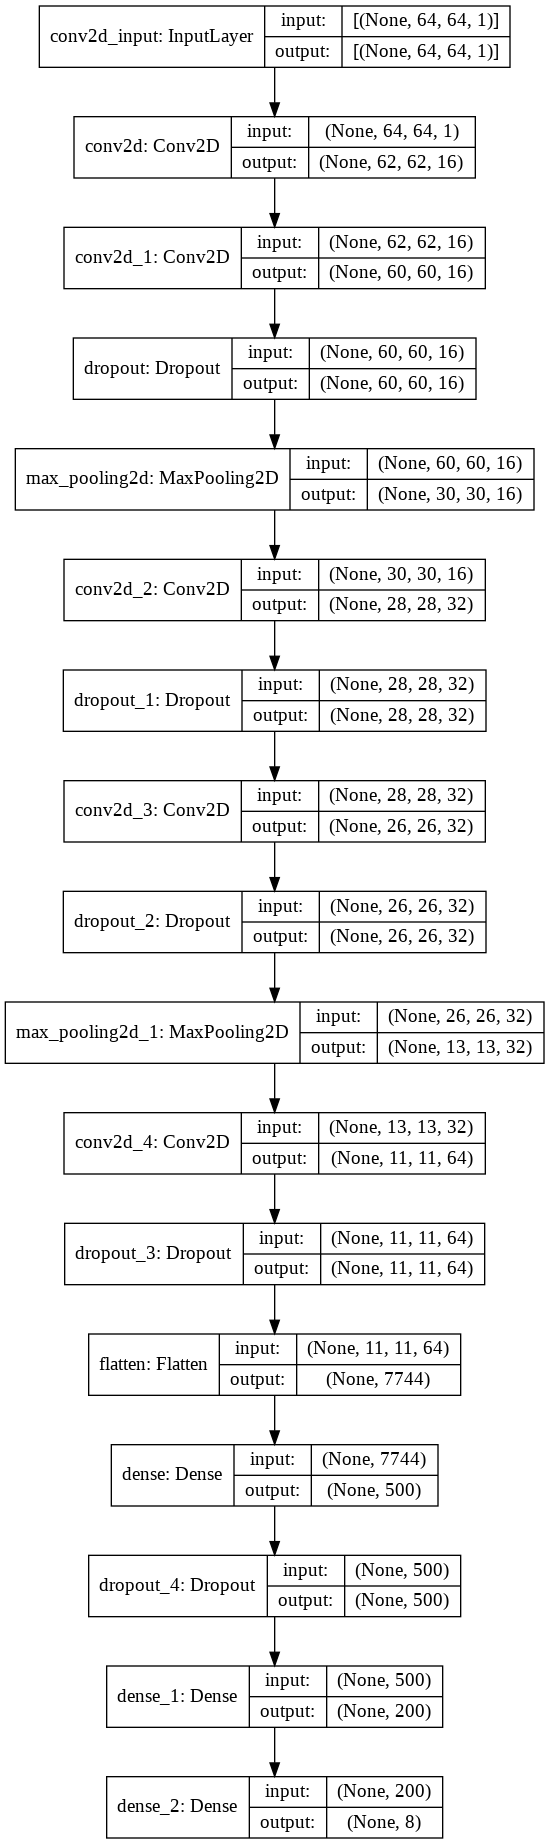

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#### Model Training

In [ ]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, y_train,epochs=100, 
                    validation_data=(test_images, y_test),validation_steps=1)

Epoch 1/100
168/168 [==============================] - 36s 25ms/step - loss: 1.1067 - accuracy: 0.5623 - val_loss: 0.4690 - val_accuracy: 0.8545
Epoch 2/100
168/168 [==============================] - 1s 9ms/step - loss: 0.4136 - accuracy: 0.8414 - val_loss: 0.2754 - val_accuracy: 0.9061
Epoch 3/100
168/168 [==============================] - 1s 9ms/step - loss: 0.2656 - accuracy: 0.9043 - val_loss: 0.2243 - val_accuracy: 0.9246
Epoch 4/100
168/168 [==============================] - 1s 9ms/step - loss: 0.1935 - accuracy: 0.9250 - val_loss: 0.1761 - val_accuracy: 0.9367
Epoch 5/100
168/168 [==============================] - 1s 9ms/step - loss: 0.1705 - accuracy: 0.9351 - val_loss: 0.1559 - val_accuracy: 0.9489
Epoch 6/100
168/168 [==============================] - 1s 9ms/step - loss: 0.1567 - accuracy: 0.9444 - val_loss: 0.2068 - val_accuracy: 0.9326
Epoch 7/100
168/168 [==============================] - 1s 9ms/step - loss: 0.1135 - accuracy: 0.9575 - val_loss: 0.1062 - val_accuracy: 0.96

83/83 - 0s - loss: 0.0567 - accuracy: 0.9867


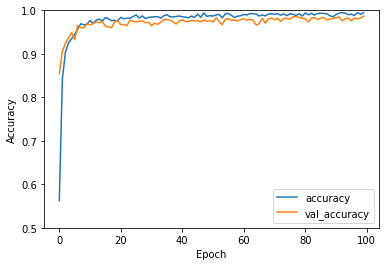

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  y_test, verbose=2)

In [ ]:
print(test_acc*100)

98.67424368858337


#### Model Serializing

In [ ]:
model.save('tamilcnn.h5')

In [ ]:
new_model = tf.keras.models.load_model('tamilcnn.h5')

In [ ]:
y_pred = new_model.predict(dataset.data)

#### Classification Report

In [ ]:
from sklearn import metrics
predicted_classes = np.argmax(y_pred, axis=1)
report = metrics.classification_report(dataset.target, predicted_classes, target_names=dataset.target_names)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1000
         103       1.00      1.00      1.00      1000
          37       1.00      1.00      1.00      1000
          48       1.00      0.99      1.00      1000
          59       0.99      1.00      1.00      1000
          70       1.00      1.00      1.00      1000
          81       0.99      1.00      0.99      1000
          92       1.00      0.99      0.99      1000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



#### Confusion Matrix

In [ ]:
metrics.confusion_matrix(dataset.target,predicted_classes)

array([[996,   0,   3,   0,   0,   0,   0,   1],
       [  0, 998,   0,   0,   0,   2,   0,   0],
       [  3,   0, 997,   0,   0,   0,   0,   0],
       [  0,   0,   0, 994,   6,   0,   0,   0],
       [  0,   0,   0,   2, 998,   0,   0,   0],
       [  0,   2,   0,   1,   0, 997,   0,   0],
       [  0,   0,   0,   0,   0,   1, 997,   2],
       [  0,   2,   0,   0,   0,   1,   9, 988]])

#### Testing

In [ ]:
imgs = ['/content/drive/MyDrive/data/196_1_3.jpg','/content/drive/MyDrive/data/189_1_2.jpg',"/content/drive/MyDrive/data/164_8_1.jpg"]
from skimage import io,color
from skimage.transform import resize
images = []
images_ = []
for i in imgs:
  img = io.imread(i)
  img = color.rgb2gray(img)
  resized_img = resize(img, (64,64,1)) 
  # resized_img /= 255.0
  images.append(img)
  images_.append(resized_img)

അ
അ
ഒ


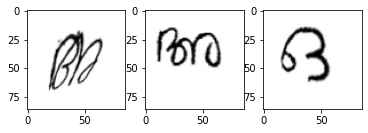

In [ ]:
import numpy as np
images_ = np.array(images_)
out = model.predict(images_)
plt.figure(1)
j = 1

mapping = {
    '1' : "അ",
    '37' : "ആ",
    '48' : "ഇ",
    '59' : "ഉ",
    '81' : "എ",
    '92' : "ഏ",
    '103' : "ഒ",
    '70' : "ഋ"
}

for i,img in zip(out,images):
  plt.subplot(13*10+j)
  plt.imshow(img,'gray')
  print(mapping[dataset.target_names[i.argmax()]])
  j+= 1
plt.show()